In [1]:
#Prevent Large File crashing on Jupyter Notebook
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import pandas as pd
import numpy as np
#import vaex, numpy as np
from matplotlib.font_manager import FontProperties
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import datetime
import warnings 
#sns.set_style("darkgrid",{"axes.axisbelow" : False })
warnings.simplefilter('ignore')
import string

# AMAZON DATA

In [3]:
amazon = pd.read_csv('amazon_metadata.csv')
gr     = pd.read_csv('goodreads_metadata.csv')

### Checking missing value

In [4]:
amazon.isnull().sum()

asin                  0
average               0
rating_count          0
text_reviews_count    0
genres                0
dtype: int64

In [5]:
gr.isnull().sum()

asin                        0
ratings_count               0
reviews_count               0
text_reviews_count          0
total_ratings_count         0
total_reviews_count         0
total_text_reviews_count    0
average_rating              0
dtype: int64

### Plot the distribution of the avarage rating 

In [6]:
amazon.describe()

,average,rating_count,text_reviews_count
count,37233.000000,37233.000000,37233.000000
mean,4.261219,152.651680,152.615798
std,0.422799,702.459338,702.255076
min,1.080000,6.000000,6.000000
25%,4.040000,22.000000,22.000000
50%,4.330000,43.000000,43.000000
75%,4.570000,107.000000,107.000000
max,5.000000,44956.000000,44947.000000


In [7]:
gr.describe()

,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,average_rating
count,3.723300e+04,3.723300e+04,37233.000000,3.723300e+04,3.723300e+04,37233.000000,37233.000000
mean,2.141833e+03,4.211693e+03,145.747267,1.147746e+04,1.963290e+04,614.953992,3.873311
std,2.213376e+04,2.996176e+04,974.148611,8.537788e+04,1.153654e+05,3121.161743,0.306148
min,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,3.000000e+00,0.000000,2.320000
25%,5.900000e+01,1.500000e+02,9.000000,2.270000e+02,6.300000e+02,27.000000,3.690000
50%,1.860000e+02,5.060000e+02,24.000000,8.210000e+02,2.103000e+03,83.000000,3.890000
75%,6.900000e+02,1.797000e+03,75.000000,3.416000e+03,7.850000e+03,292.000000,4.080000
max,2.056193e+06,2.238009e+06,68752.000000,4.718437e+06,5.684376e+06,152766.000000,5.000000


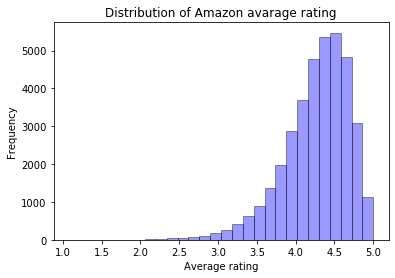

In [8]:
#fig,ax=plt.subplots(1,2)
sns.distplot(amazon.average, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.title('Distribution of Amazon avarage rating')
plt.show()

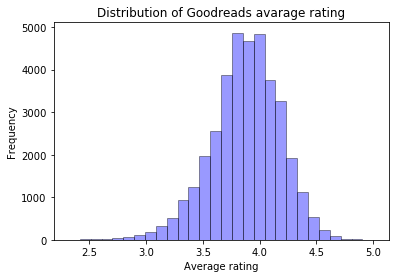

In [9]:
sns.distplot(gr.average_rating, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.title('Distribution of Goodreads avarage rating')
plt.show()

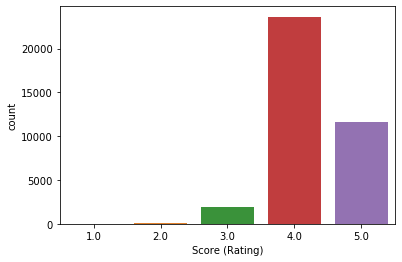

In [10]:
plt.figure()
sns.countplot(x=np.round(amazon.average,0))
plt.xlabel('Score (Rating)')
plt.show()

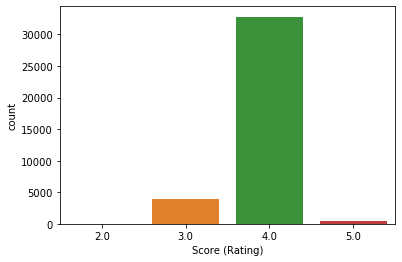

In [11]:
plt.figure()
sns.countplot(x=np.round(gr.average_rating,0), data=gr)#,palette='RdBu')
plt.xlabel('Score (Rating)')
plt.show()

### Average rating vs number of reviews

Text(0.5, 1.0, 'Amazon Average Rating vs Number of Ratings')

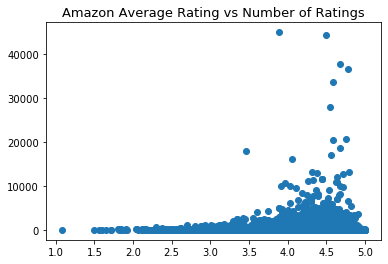

In [12]:
plt.scatter(amazon.average,amazon.rating_count)
plt.title('Amazon Average Rating vs Number of Ratings', size = 13)

Text(0.5, 1.0, 'Goodreads Average Rating vs Number of Ratings')

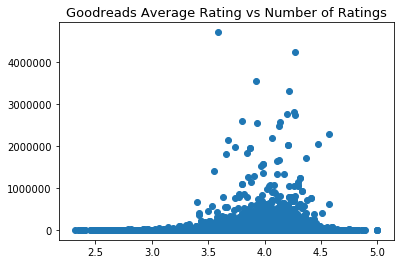

In [13]:
plt.scatter(gr.average_rating,gr.total_ratings_count)
plt.title('Goodreads Average Rating vs Number of Ratings', size = 13)

## Amazon rating - Goodreads rating

In [14]:
amazon_gr = pd.merge(amazon, gr, how = 'inner', on ='asin')

In [15]:
amazon_gr['rating_diff'] = amazon_gr['average'] -  amazon_gr['average_rating']

In [16]:
am_gr = pd.DataFrame(amazon_gr, columns = ['asin','rating_diff','average','rating_count', 'text_reviews_count_x','total_ratings_count',
                                           'total_text_reviews_count', 'average_rating','genres'])

In [17]:
am_gr = am_gr.rename(columns = {'average':'amazon_average', 'rating_count': 'amazon_rating_count', 
                                'text_reviews_count_x': 'amazon_text_reviews_count', 'total_ratings_count': 'gr_rating_count',
                                'total_text_reviews_count':'gr_text_reviews_count', 'average_rating': 'gr_average'})

In [18]:
am_gr.describe()

,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average
count,37233.000000,37233.000000,37233.000000,37233.000000,3.723300e+04,37233.000000,37233.000000
mean,0.387908,4.261219,152.651680,152.615798,1.147746e+04,614.953992,3.873311
std,0.335298,0.422799,702.459338,702.255076,8.537788e+04,3121.161743,0.306148
min,-2.780000,1.080000,6.000000,6.000000,1.000000e+00,0.000000,2.320000
25%,0.210000,4.040000,22.000000,22.000000,2.270000e+02,27.000000,3.690000
50%,0.410000,4.330000,43.000000,43.000000,8.210000e+02,83.000000,3.890000
75%,0.590000,4.570000,107.000000,107.000000,3.416000e+03,292.000000,4.080000
max,1.990000,5.000000,44956.000000,44947.000000,4.718437e+06,152766.000000,5.000000


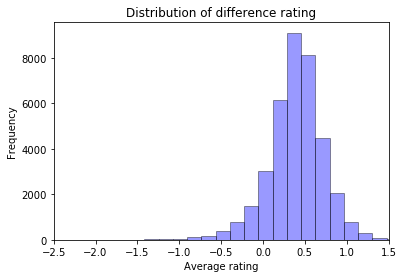

In [19]:
sns.distplot(am_gr.rating_diff, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Average rating')
plt.ylabel('Frequency')
plt.title('Distribution of difference rating')
plt.xlim(-2.5,1.5)
plt.show()

In [20]:
am_gr['rating_count'] = am_gr['amazon_rating_count']+am_gr['gr_rating_count']
am_gr['text_reviews_count'] = am_gr['amazon_text_reviews_count']+am_gr['gr_text_reviews_count']
am_gr

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,genres,rating_count,text_reviews_count
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction",691,109
1,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction",266,81
2,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction,845,172
3,0002007649,-0.20,3.37,19,19,356,41,3.57,"Science & Math, Chemistry",375,60
4,0001716069,0.79,4.61,59,59,1559,102,3.82,"Literature & Fiction, Poetry",1618,161
...,...,...,...,...,...,...,...,...,...,...,...
37228,0312943636,0.44,4.17,24,24,1795,134,3.73,"Literature & Fiction, Fiction",1819,158
37229,0312953038,0.25,4.00,27,27,1128,59,3.75,"Romance, Historical",1155,86
37230,0312955154,-0.07,3.29,14,14,56,5,3.36,"Literature & Fiction, Fiction",70,19
37231,0312956878,-0.45,3.33,15,15,59,4,3.78,"Biographies & Memoirs, True Crime",74,19


Text(0, 0.5, 'Number of Ratings')

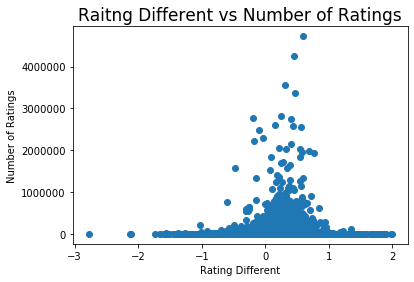

In [26]:
plt.scatter(am_gr.rating_diff, am_gr.rating_count)
plt.title('Raitng Different vs Number of Ratings', size = 17)
plt.xlabel('Rating Different', size =10)
plt.ylabel('Number of Ratings', size =10)

Text(0, 0.5, 'Number of Text Reviews')

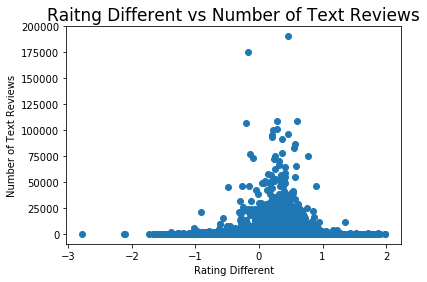

In [27]:
plt.scatter(am_gr.rating_diff, am_gr.text_reviews_count)
plt.title('Raitng Different vs Number of Text Reviews', size = 17)
plt.xlabel('Rating Different', size =10)
plt.ylabel('Number of Text Reviews', size =10)